In [1]:
from generadorGLC import glc as glcGen
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chisquare

In [2]:
glc = glcGen(a=1103515245, c=12345, m=2**31, seed=123)
dataGLC= []
for i in range(500):
    dataGLC.append(glc.random())

# Crear un DataFrame de Pandas a partir de la lista de datos generados
GLC_df = pd.DataFrame(dataGLC, columns=['Data'])

# Imprimir el DataFrame de Pandas
print(GLC_df)

         Data
0    0.205318
1    0.687386
2    0.776789
3    0.402471
4    0.532480
..        ...
495  0.512600
496  0.199171
497  0.998662
498  0.849645
499  0.816245

[500 rows x 1 columns]


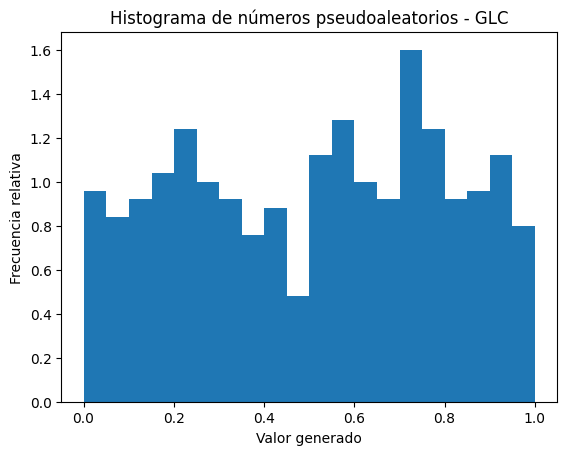

In [3]:
plt.hist(GLC_df, bins=20, density=True)
plt.xlabel('Valor generado')
plt.ylabel('Frecuencia relativa')
plt.title('Histograma de números pseudoaleatorios - GLC')
plt.show()

In [4]:
# Calcular la función de probabilidad acumulada
cdf = np.cumsum(np.histogram(GLC_df, bins=10, range=(0, 1))[0])

# Normalizar la función de probabilidad acumulada para que tenga valores entre 0 y 1
cdf = cdf / cdf[-1]

# Imprimir la función de probabilidad acumulada
print(cdf)

[0.09  0.188 0.3   0.382 0.452 0.572 0.668 0.81  0.904 1.   ]


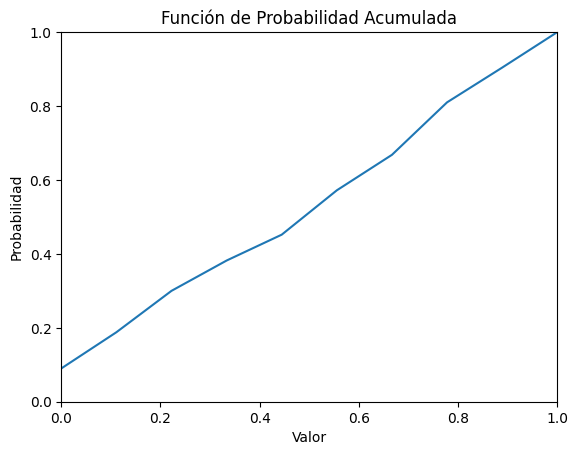

In [5]:
# Generar valores para el eje x
x = np.linspace(0, 1, num=len(cdf))

# Graficar la función de probabilidad acumulada
plt.plot(x, cdf)

# Configurar los ejes
plt.xlim(0, 1)
plt.ylim(0, 1)

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.title('Función de Probabilidad Acumulada')

# Mostrar la gráfica
plt.show()

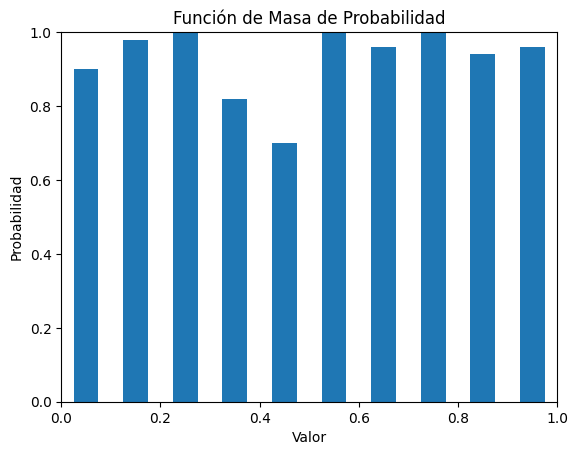

In [6]:
# Calcular la función de masa de probabilidad
pmf, bins = np.histogram(GLC_df, bins=10, range=(0, 1), density=True)

# Generar valores para el eje x
x = 0.5 * (bins[:-1] + bins[1:])

# Graficar la función de masa de probabilidad
plt.bar(x, pmf, width=0.05)

# Configurar los ejes
plt.xlim(0, 1)
plt.ylim(0, 1)

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.title('Función de Masa de Probabilidad')

# Mostrar la gráfica
plt.show()